<a href="https://colab.research.google.com/github/Maruf346/AI-ML-with-python/blob/main/A_star_Algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Install (only if not already installed)
!pip install networkx matplotlib --quiet

# **Graph Visualization (Not for You)::**

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# ---------- Function 1: Create Graph ----------
def create_graph(adjacency_list, heuristic_dict):
    G = nx.Graph()
    for u in adjacency_list:
        for v, weight in adjacency_list[u]:
            G.add_edge(u, v, weight=weight)
    return G, heuristic_dict

# ---------- Function 2: Draw Graph ----------
def draw_graph(G, heuristic_dict, positions=None, title="Graph Visualization"):
    # Default position if none provided
    if not positions:
        positions = nx.spring_layout(G, seed=42)

    # Add heuristic labels to nodes
    node_labels = {node: f"{node}\n(h={heuristic_dict.get(node, '?')})" for node in G.nodes}
    edge_labels = nx.get_edge_attributes(G, 'weight')

    # Plotting
    plt.figure(figsize=(10, 6))
    nx.draw(G, positions, with_labels=False, node_color='lightcyan',
            node_size=1500, edge_color='gray', width=1.5)
    nx.draw_networkx_labels(G, positions, labels=node_labels,
                            font_size=10, font_weight='bold')
    nx.draw_networkx_edge_labels(G, positions, edge_labels=edge_labels, font_size=10)

    plt.title(title, fontsize=14)
    plt.axis('off')
    plt.show()


# *Graph 1*

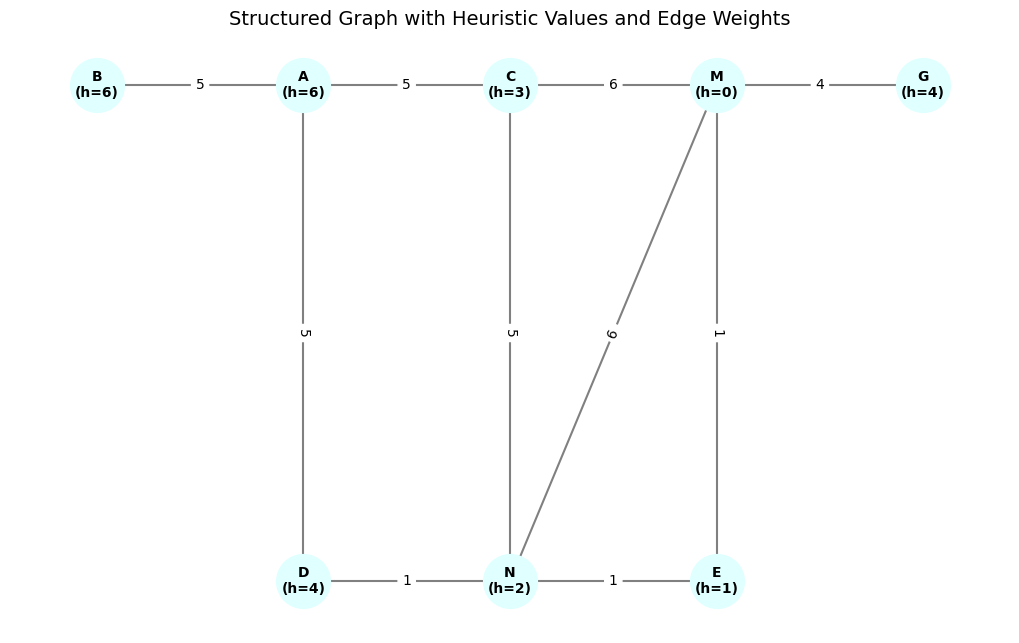

In [ ]:
# ---------- Graph input ----------
adjacency_list = {
    'A': [('B', 5), ('C', 5), ('D', 5)],
    'B': [('A', 5)],
    'C': [('A', 5), ('M', 6), ('N', 5)],
    'D': [('A', 5), ('N', 1)],
    'E': [('N', 1), ('M', 1)],
    'G': [('M', 4)],
    'M': [('C', 6), ('E', 1), ('N', 6), ('G', 4)],
    'N': [('D', 1), ('C', 5), ('E', 1), ('M', 6)]
}

heuristic_dict = {
    'A': 6, 'B': 6, 'C': 3, 'D': 4,
    'E': 1, 'G': 4, 'M': 0, 'N': 2
}

positions = {
    'B': (-2, 2),
    'A': (0, 2),
    'C': (2, 2),
    'D': (0, 0),
    'N': (2, 0),
    'E': (4, 0),
    'M': (4, 2),
    'G': (6, 2)
}

# ---------- Run ----------
G, h_dict = create_graph(adjacency_list, heuristic_dict)
draw_graph(G, h_dict, positions, title="Structured Graph with Heuristic Values and Edge Weights")


# *Graph 2*

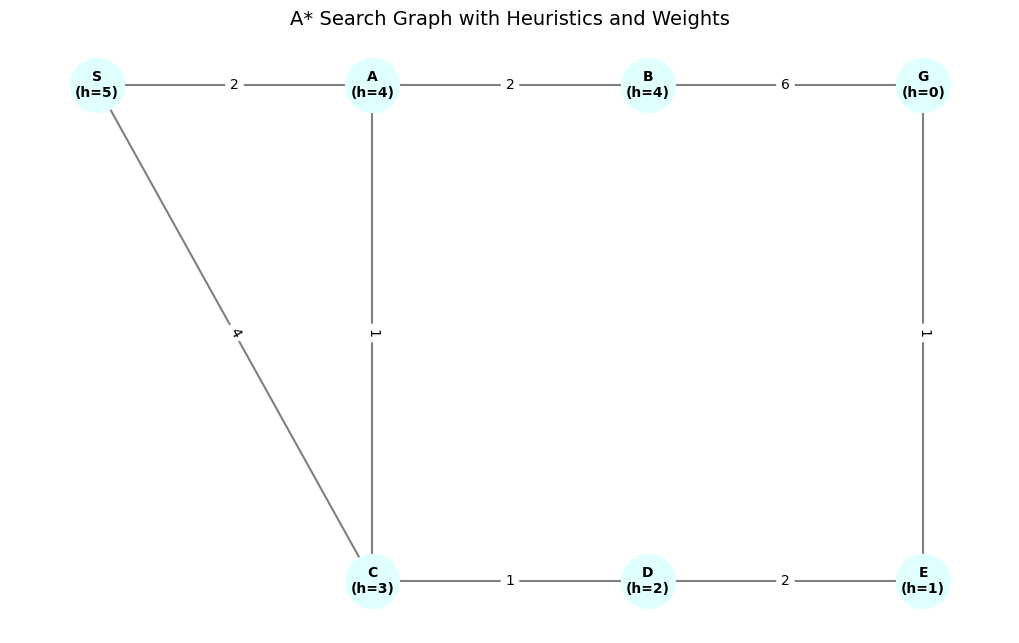

In [ ]:
# Define the graph (undirected with costs)
graph = {
    'S': [('A', 2), ('C', 4)],
    'A': [('S', 2), ('B', 2), ('C', 1)],
    'B': [('A', 2), ('G', 6)],
    'C': [('S', 4), ('A', 1), ('D', 1)],
    'D': [('C', 1), ('E', 2)],
    'E': [('D', 2), ('G', 1)],
    'G': [('B', 6), ('E', 1)]
}

# Heuristic values
heuristic = {
    'S': 5,
    'A': 4,
    'B': 4,
    'C': 3,
    'D': 2,
    'E': 1,
    'G': 0
}

# Define positions for structured layout
positions = {
    'S': (0, 2),
    'A': (2, 2),
    'B': (4, 2),
    'C': (2, 1),
    'D': (4, 1),
    'E': (6, 1),
    'G': (6, 2)
}

# Build and draw the graph
G, h_dict = create_graph(graph, heuristic)
draw_graph(G, h_dict, positions, title="A* Search Graph with Heuristics and Weights")


# **A-star Code**

In [ ]:
import heapq

def astar(start, goal, graph, h):
    if start not in graph or goal not in graph:
        return None, float('inf')  # invalid input

    pq = []  # priority queue: (f = g + h, g, node, path)
    heapq.heappush(pq, (h.get(start, 0), 0, start, [start]))
    best_g = {start: 0}

    while pq:
        f, g, current, path = heapq.heappop(pq)

        if current == goal:
            return path, g

        for neighbor, cost in graph.get(current, []):
            g2 = g + cost
            if g2 < best_g.get(neighbor, float('inf')):
                best_g[neighbor] = g2
                f2 = g2 + h.get(neighbor, float('inf'))
                heapq.heappush(pq, (f2, g2, neighbor, path + [neighbor]))

    return None, float('inf')  # no path found


# **Graph 1 as input in A-star**

In [ ]:
# ---------- Adjacency list from the image ----------
graph = {
    'A': [('B', 5), ('C', 5), ('D', 5)],
    'B': [('A', 5)],
    'C': [('A', 5), ('M', 6), ('N', 5)],
    'D': [('A', 5), ('N', 1)],
    'E': [('N', 1), ('M', 1)],
    'G': [('M', 4)],
    'M': [('C', 6), ('E', 1), ('N', 6), ('G', 4)],
    'N': [('D', 1), ('C', 5), ('E', 1), ('M', 6)]
}

# ---------- Heuristic table from the figure ----------
h = {'A': 6, 'B': 6, 'C': 3, 'D': 4,
     'E': 1, 'G': 4, 'M': 0, 'N': 2}

start = 'A'
goal = 'M'

path, cost = astar(start, goal, graph, heuristic)
print("Optimal path:", path)
print("Total cost  :", cost)


Optimal path: ['A', 'D', 'N', 'E', 'M']
Total cost  : 8


# **Graph 2 as input in A-star**

In [5]:
graph = {
    'S': [('A', 2), ('C', 4)],
    'A': [('S', 2), ('B', 2), ('C', 1)],
    'B': [('A', 2), ('G', 6)],
    'C': [('S', 4), ('A', 1), ('D', 1)],
    'D': [('C', 1), ('E', 2)],
    'E': [('D', 2), ('G', 1)],
    'G': [('B', 6), ('E', 1)]
}

heuristic = {
    'S': 5,
    'A': 4,
    'B': 4,
    'C': 3,
    'D': 2,
    'E': 1,
    'G': 0
}

start = 'S'
goal = 'E'

path, cost = astar(start, goal, graph, heuristic)
print("Optimal path:", path)
print("Total cost  :", cost)


NameError: name 'astar' is not defined